<div style="
    background-color: #0b2343; 
    color: white; 
    padding: 25px; 
    font-family: Arial, sans-serif;
">
    <h2 style="margin: 0; font-size: 24px; font-weight: normal;">
        Data Analytics & Machine Learning in Finance
    </h2>
    <h1 style="margin: 5px 0 0 0; font-size: 48px; font-weight: bold;">
        Classification (Random Forest, Gradient Boosting)
    </h1>
    <p style="margin: 8px 0 0 0; font-size: 18px;">
        Pedro Ramón Ventura Gómez
    </p>
    <p style="margin: 2px 0 0 0; font-size: 16px;">
        pventura@march-am.com
    </p>
</div>


# Classification (Random Forest, Gradient Boosting)

## Random Forest


**Random Forest** is a **supervised ensemble learning algorithm** used for **classification** (and regression) tasks.

It builds a collection (*forest*) of **parallel** decision trees and combines their outputs to make more robust predictions.

* **Supervised:** Requires a labeled dataset (features $X$ and target $y$) to learn.
* **Classification:** Predicts the class of a new sample by aggregating the predictions of many decision trees (majority vote).
* **Ensemble method:** Combines multiple weak learners (individual trees) to create a stronger model.
* **Non-parametric:** Does not assume a specific distribution or fixed functional form.


### How it works

1. **Bootstrap sampling (Bagging):** Each tree is trained on a random **sample with replacement** of the training data. This ensures that every tree sees a slightly different dataset, introducing **diversity** into the forest.

2. **Random feature selection:** At each split (at each node), only a random subset of features is considered. This further **decorrelates** the trees, so they do not all make the same decisions.

3. **Tree growing:** Each tree is usually grown to maximum depth (unpruned). Instead of pruning to prevent overfitting, Random Forest relies on **randomness + majority vote (average)** to reduce variance.
   - This makes some trees perform well on certain subsets of data and poorly on others.
   - The key idea: **individual trees may be weak, but the ensemble is strong**.

4. **Aggregation:**
   - **Classification:** Each tree votes for a class, and the forest prediction is the **majority vote**.
   - **Regression:** Each tree outputs a value, and the forest prediction is the **average** of those values.

<div style="text-align: center">
    <img src="./images/classification/random_forest.webp" style="width:75%;background-color: white; padding: 10px;">
</div>

### Main Hyperparameters

- Number of trees in the forest.
- Number of features considered at each split.
- Maximum tree depth, minimum samples per split/leaf (to control complexity).

### Advantages

- **High accuracy:** Reduces variance by averaging many trees.
- **Works with both categorical and numerical data.**
- **Feature importance:** Can estimate which features are most influential.
- **Non-parametric:** No assumption about data distribution.
- **Fast inference:** Trees run in parallel.

### Disadvantages

- **Less interpretable:** Harder to visualize than a single tree.
- **Large memory usage:** Storing many trees can be costly.
- **Overfitting risk:** Even though Random Forests are generally robust, they can overfit when the **feature space is small** and you use **too many estimators**.
  * Random Forests shine in *high-dimensional* settings (lots of features), where random feature selection adds diversity.
  * With a **small number of features**, trees tend to look very similar, so adding more estimators mostly reinforces the same splits instead of adding diversity.
  * With a **small number of samples**, you should also control tree complexity (e.g., by limiting depth, setting minimum samples per leaf/split). This acts as a form of *pre-pruning* to avoid overly complex trees that memorize noise.

## Playing with financial assets: Stock Picking

Lets recall the linear regression example, where we achieved an accuracy of 51.25% and a final accumulated return of the portfolio of 30.16%

In [1]:
import numpy as np
import pandas as pd

Load data

In [2]:
train_df = pd.read_csv("../dataset/01_LR_training_data_standardized.csv")
predict_df = pd.read_csv("../dataset/01_LR_prediction_data_standardized.csv")
test_px_comp = pd.read_csv("../dataset/01_LR_test_data_component_prices.csv", index_col="Date", parse_dates=True)
test_px_idx = pd.read_csv("../dataset/01_LR_test_data_index_prices.csv", index_col="Date", parse_dates=True)

In [3]:
train_df.shape

(42536, 7)

Train model

In [4]:
from sklearn.ensemble import RandomForestClassifier

X = train_df.iloc[:, :-1]
y = train_df["target"]

model_rfc = RandomForestClassifier(n_estimators=3, bootstrap=True, random_state=42)
model_rfc.fit(X, y)

print(f"Accuracy: {model_rfc.score(X, y)}")


Accuracy: 0.9109460221929659


Predict probabilities of out- or underperform for the next week (class 1 or 0).

In [5]:
# Predict probabilities of out- or underperform for the next week (class 1 or 0).
proba_next_test = model_rfc.predict_proba(predict_df.iloc[:, 1:])
# Create a DataFrame with the results, add tickers and sort descending.
df = pd.DataFrame(proba_next_test, columns=["P(y=0)", "P(y=1)"])
df["ticker"] = predict_df["ticker"].values
df.set_index("ticker", inplace=True)
df.sort_values(by="P(y=1)", ascending=False, inplace=True)
# Select those with a probability greater than 'th'.
th = 0.8
df_top_n = df[df["P(y=1)"] > th]
# Create a portfolio using probabilities as weights.
portfolio_weights = df_top_n.loc[:, ["P(y=1)"]] / df_top_n.loc[:, ["P(y=1)"]].sum()
portfolio_weights.columns = ["weight"]
portfolio_weights


,weight
ticker,
BA,0.018182
VZ,0.018182
SBAC,0.018182
CME,0.018182
AME,0.018182
AMP,0.018182
BAX,0.018182
SYK,0.018182
CF,0.018182


In [6]:
# Log returns for components and index.
ret_comp = np.log(test_px_comp).diff().fillna(0)
ret_idx = np.log(test_px_idx).diff().fillna(0)
# Log returns for the portfolio.
print(f"Shape of portfolio weights: {portfolio_weights['weight'].shape}")
print(f"Shape of component returns: {ret_comp.loc[:, portfolio_weights.index].shape}")
ret_p = ret_comp.loc[:, portfolio_weights.index] @ portfolio_weights["weight"]  # R @ w
ret_p.name = "Portfolio"
ret_p

Shape of portfolio weights: (55,)
Shape of component returns: (52, 55)


Date
2009-12-30    0.000000
2010-01-06    0.013013
2010-01-13    0.013991
2010-01-20   -0.012863
2010-01-27   -0.040729
2010-02-03   -0.003632
2010-02-10   -0.029359
2010-02-17    0.043698
2010-02-24    0.005204
2010-03-03    0.028133
2010-03-10    0.026358
2010-03-17    0.023826
2010-03-24    0.007679
2010-03-31   -0.001025
2010-04-07    0.019050
2010-04-14    0.022978
2010-04-21    0.003300
2010-04-28   -0.003945
2010-05-05   -0.022392
2010-05-12    0.014835
2010-05-19   -0.057973
2010-05-26   -0.040271
2010-06-02    0.028573
2010-06-09   -0.051048
2010-06-16    0.072466
2010-06-23   -0.026612
2010-06-30   -0.065188
2010-07-07    0.022174
2010-07-14    0.042545
2010-07-21   -0.026986
2010-07-28    0.048156
2010-08-04    0.030868
2010-08-11   -0.042649
2010-08-18    0.011679
2010-08-25   -0.037939
2010-09-01    0.034039
2010-09-08    0.023058
2010-09-15    0.025695
2010-09-22    0.007619
2010-09-29    0.019321
2010-10-06    0.013262
2010-10-13    0.022610
2010-10-20    0.000075
2010-1

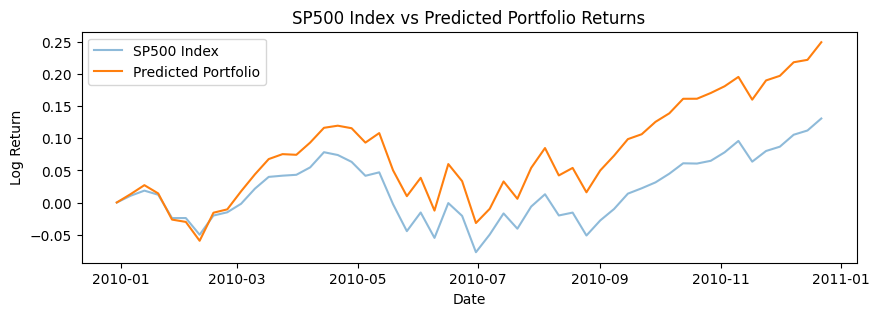

Final accumulated return of SP500 Index: 0.13084380194114686
Final accumulated return of Predicted Portfolio: 0.2495988629887002


In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(ret_idx.cumsum(), label="SP500 Index", alpha=0.5)
plt.plot(ret_p.cumsum(), label="Predicted Portfolio")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.title("SP500 Index vs Predicted Portfolio Returns")
plt.legend()
plt.show()

print(f"Final accumulated return of SP500 Index: {ret_idx.cumsum().iloc[-1, 0]}")
print(f"Final accumulated return of Predicted Portfolio: {ret_p.cumsum().iloc[-1]}")


**Homework**

- Complete the backtest of the strategy by iterating through the remaining train/test datasets.
- Try to improve the model's accuracy by incorporating additional features (take the paper as a reference).
- Play with hyper-parameters (parameters of the `RandomForestClassifier` class).

## Gradient Boosting

**Gradient Tree Boosting** is a **supervised ensemble learning algorithm** used for **classification** (and regression).

It builds a strong predictive model by combining many **weak learners** (usually shallow decision trees) in a **sequential** manner, where each new tree corrects the errors of the previous ones.

- **Supervised:** Requires a labeled dataset (features $X$ and target $y$).
- **Classification:** Predicts the class of a new sample by iteratively improving probability estimates.
- **Ensemble method (Boosting):** Combines weak learners sequentially, each focused on reducing the mistakes of the ensemble so far.
- **Non-parametric:** Makes no assumptions about data distribution.

### How it works
1. **Initialize the model:**
   Start with a constant prediction (e.g., log-odds of the positive class).

   - Probability ($p$): This is the likelihood that an instance belongs to the positive class. 
   - Odds: The odds are the ratio of the probability of success to the probability of failure (the negative class).
      $$Odds = p / (1-p)$$
   - Log-Odds (Logit): The natural logarithm of the odds gives the log-odds. 
      $$log(p / (1-p))$$

2. **Compute residuals (pseudo-residuals):**
   For each sample, compute how far the current prediction is from the true label.

   - In classification, this is the **negative gradient of the loss function** (e.g., cross-entropy).

      $$
      XE(y, \hat{y}) = - \Big[ y \log(\hat{y}) + (1-y)\log(1-\hat{y}) \Big]
      $$

3. **Fit a weak learner:**
   Train a shallow decision tree to predict these residuals.

4. **Update the model:**
   Add the new tree to the ensemble, weighted by a learning rate $\eta$:

   $$
   F_m(x) = F_{m-1}(x) + \eta \cdot h_m(x)
   $$

   - $F_m(x)$: prediction after $m$ trees
   - $h_m(x)$: prediction from the new tree

5. **Repeat:**
   Iterate steps 2–4 for a set number of trees (estimators) or until convergence.

6. **Final prediction:**

   - **Classification:** Transform the final score into probabilities via the sigmoid or softmax function.
   - Assign the class with highest probability.

### Main Hyperparameters

- Number of trees.
- Maximum depth of each tree (usually shallow, 3–6).
- Learning rate $\eta$: Step size when adding new trees. Small values improve generalization but require more trees.
- Subsample: Fraction of samples used for each tree (introduces randomness, prevents overfitting).
- Max features: Number of features considered per split.

### Advantages

- **High accuracy:** Among the best-performing algorithms in practice.
- **Handles complex relationships:** Each tree corrects the mistakes of the previous ones.
- **Works with mixed data types (categorical/numerical).**

### Disadvantages

- **Less interpretable:** Harder to visualize than a single tree.
- **Large memory usage:** Storing many trees can be costly.
- **Slower training and inference:** Trees are built sequentially, not in parallel.
- **Overfitting risk:** If too many trees or too high learning rate are used.

### Using `GradientBoostingClassifier`

Train model

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

X = train_df.iloc[:, :-1]
y = train_df["target"]

model_gbc = GradientBoostingClassifier(
    loss="log_loss", learning_rate=1.0, n_estimators=100, max_depth=3, random_state=42
)
model_gbc.fit(X, y)

print(f"Accuracy: {model_gbc.score(X, y)}")


Accuracy: 0.6023368440850103


Predict probabilities of out- or underperform for the next week (class 1 or 0).

In [50]:
# Predict probabilities of out- or underperform for the next week (class 1 or 0).
proba_next_test = model_gbc.predict_proba(predict_df.iloc[:, 1:])
# Create a DataFrame with the results, add tickers and sort descending.
df = pd.DataFrame(proba_next_test, columns=["P(y=0)", "P(y=1)"])
df["ticker"] = predict_df["ticker"].values
df.set_index("ticker", inplace=True)
df.sort_values(by="P(y=1)", ascending=False, inplace=True)
# Select those with a probability greater than 'th'.
th = 0.9
df_top_n = df[df["P(y=1)"] > th]
# Create a portfolio using probabilities as weights.
portfolio_weights = df_top_n.loc[:, ["P(y=1)"]] / df_top_n.loc[:, ["P(y=1)"]].sum()
portfolio_weights.columns = ["weight"]
portfolio_weights


,weight
ticker,
UAL,0.348321
NFLX,0.333659
CTRA,0.318019


In [51]:
# Log returns for components and index.
ret_comp = np.log(test_px_comp).diff().fillna(0)
ret_idx = np.log(test_px_idx).diff().fillna(0)
# Log returns for the portfolio.
print(f"Shape of portfolio weights: {portfolio_weights['weight'].shape}")
print(f"Shape of component returns: {ret_comp.loc[:, portfolio_weights.index].shape}")
ret_p = ret_comp.loc[:, portfolio_weights.index] @ portfolio_weights["weight"]  # R @ w
ret_p.name = "Portfolio"
ret_p

Shape of portfolio weights: (3,)
Shape of component returns: (52, 3)


Date
2009-12-30    0.000000
2010-01-06    0.010106
2010-01-13    0.006445
2010-01-20   -0.031772
2010-01-27   -0.047691
2010-02-03    0.084994
2010-02-10    0.028902
2010-02-17    0.035664
2010-02-24    0.003138
2010-03-03    0.073020
2010-03-10    0.038295
2010-03-17    0.006707
2010-03-24   -0.018805
2010-03-31   -0.006257
2010-04-07    0.026909
2010-04-14    0.107770
2010-04-21   -0.029297
2010-04-28    0.043319
2010-05-05   -0.066716
2010-05-12    0.037038
2010-05-19   -0.063767
2010-05-26    0.025466
2010-06-02    0.079939
2010-06-09   -0.003823
2010-06-16    0.101704
2010-06-23   -0.096440
2010-06-30   -0.066221
2010-07-07    0.030370
2010-07-14    0.066910
2010-07-21   -0.031082
2010-07-28   -0.055754
2010-08-04    0.035662
2010-08-11    0.008675
2010-08-18   -0.003511
2010-08-25   -0.062943
2010-09-01    0.079780
2010-09-08    0.026533
2010-09-15   -0.009892
2010-09-22    0.029626
2010-09-29    0.070171
2010-10-06   -0.006219
2010-10-13    0.029051
2010-10-20    0.001563
2010-1

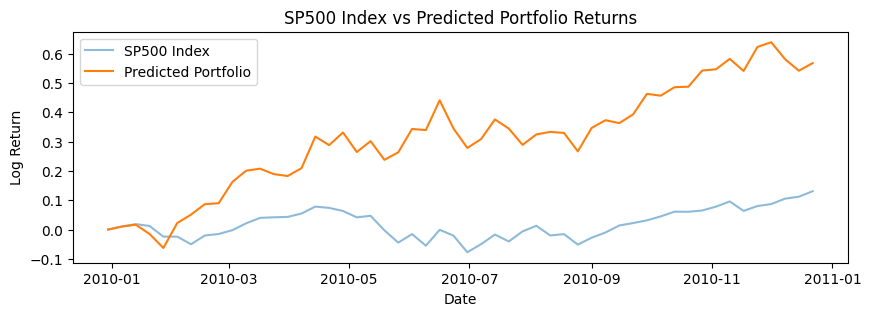

Final accumulated return of SP500 Index: 0.13084380194114686
Final accumulated return of Predicted Portfolio: 0.5681609508761555


In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(ret_idx.cumsum(), label="SP500 Index", alpha=0.5)
plt.plot(ret_p.cumsum(), label="Predicted Portfolio")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.title("SP500 Index vs Predicted Portfolio Returns")
plt.legend()
plt.show()

print(f"Final accumulated return of SP500 Index: {ret_idx.cumsum().iloc[-1, 0]}")
print(f"Final accumulated return of Predicted Portfolio: {ret_p.cumsum().iloc[-1]}")


### Using `XGBoost`

Train model

In [121]:
from xgboost import XGBClassifier

X = train_df.iloc[:, :-1]
y = train_df["target"]

model_xgbc = XGBClassifier(
    n_estimators=100, max_depth=4, learning_rate=1.0, objective="binary:logistic", random_state=42
)
model_xgbc.fit(X, y)

print(f"Accuracy: {model_xgbc.score(X, y)}")


Accuracy: 0.6492382922700771


Predict probabilities of out- or underperform for the next week (class 1 or 0).

In [122]:
# Predict probabilities of out- or underperform for the next week (class 1 or 0).
proba_next_test = model_xgbc.predict_proba(predict_df.iloc[:, 1:])
# Create a DataFrame with the results, add tickers and sort descending.
df = pd.DataFrame(proba_next_test, columns=["P(y=0)", "P(y=1)"])
df["ticker"] = predict_df["ticker"].values
df.set_index("ticker", inplace=True)
df.sort_values(by="P(y=1)", ascending=False, inplace=True)
# Select those with a probability greater than 'th'.
th = 0.9
df_top_n = df[df["P(y=1)"] > th]
# Create a portfolio using probabilities as weights.
portfolio_weights = df_top_n.loc[:, ["P(y=1)"]] / df_top_n.loc[:, ["P(y=1)"]].sum()
portfolio_weights.columns = ["weight"]
portfolio_weights


,weight
ticker,
RSG,0.333898
UAL,0.333277
GIS,0.332825


In [123]:
# Log returns for components and index.
ret_comp = np.log(test_px_comp).diff().fillna(0)
ret_idx = np.log(test_px_idx).diff().fillna(0)
# Log returns for the portfolio.
print(f"Shape of portfolio weights: {portfolio_weights['weight'].shape}")
print(f"Shape of component returns: {ret_comp.loc[:, portfolio_weights.index].shape}")
ret_p = ret_comp.loc[:, portfolio_weights.index] @ portfolio_weights["weight"]  # R @ w
ret_p.name = "Portfolio"
ret_p

Shape of portfolio weights: (3,)
Shape of component returns: (52, 3)


Date
2009-12-30    0.000000
2010-01-06    0.011292
2010-01-13    0.027455
2010-01-20   -0.021922
2010-01-27   -0.033103
2010-02-03    0.005298
2010-02-10    0.030495
2010-02-17    0.029090
2010-02-24    0.015980
2010-03-03    0.069215
2010-03-10    0.003939
2010-03-17    0.014440
2010-03-24   -0.002658
2010-03-31   -0.003067
2010-04-07   -0.005998
2010-04-14    0.065888
2010-04-21   -0.011759
2010-04-28   -0.003714
2010-05-05   -0.019480
2010-05-12    0.018711
2010-05-19   -0.036457
2010-05-26   -0.010985
2010-06-02    0.065742
2010-06-09   -0.004582
2010-06-16    0.064666
2010-06-23   -0.040089
2010-06-30   -0.051517
2010-07-07    0.004491
2010-07-14    0.045728
2010-07-21   -0.018174
2010-07-28    0.044080
2010-08-04   -0.021811
2010-08-11   -0.058761
2010-08-18    0.022813
2010-08-25   -0.037760
2010-09-01    0.054492
2010-09-08    0.002553
2010-09-15    0.005445
2010-09-22    0.018159
2010-09-29    0.006984
2010-10-06    0.036217
2010-10-13    0.030897
2010-10-20   -0.007876
2010-1

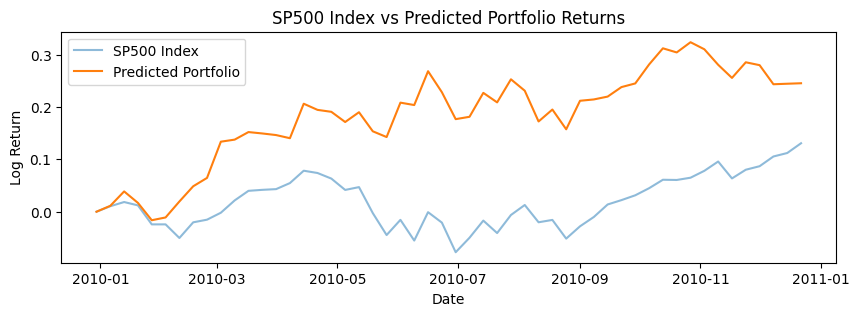

Final accumulated return of SP500 Index: 0.13084380194114686
Final accumulated return of Predicted Portfolio: 0.24547143569760027


In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(ret_idx.cumsum(), label="SP500 Index", alpha=0.5)
plt.plot(ret_p.cumsum(), label="Predicted Portfolio")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.title("SP500 Index vs Predicted Portfolio Returns")
plt.legend()
plt.show()

print(f"Final accumulated return of SP500 Index: {ret_idx.cumsum().iloc[-1, 0]}")
print(f"Final accumulated return of Predicted Portfolio: {ret_p.cumsum().iloc[-1]}")
